# Predicting Bike Rentals

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

In this project, multiple ML approaches applied to predict the total number of bikes people rented in a given hour.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bike = pd.read_csv('bike_rental_hour.csv')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


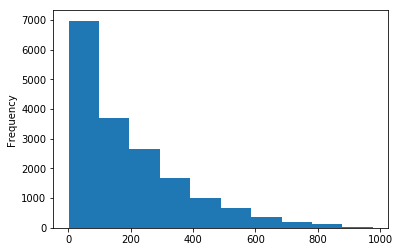

In [7]:
bike['cnt'].plot(kind = 'hist')
plt.show()

In [10]:
bike.corr()['cnt'].abs().sort_values()

weekday       0.026900
workingday    0.030284
holiday       0.030927
windspeed     0.093234
mnth          0.120638
weathersit    0.142426
season        0.178056
yr            0.250495
instant       0.278379
hum           0.322911
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [12]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike["time_label"] = bike["hr"].apply(assign_label)
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


# Error metric

The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [16]:
# Split traing and testing data
train = bike.sample(frac=.8)
test = bike.loc[~bike.index.isin(train.index)]

In [21]:
feature = bike.drop(['casual', 'registered', 'dteday', 'cnt'], axis = 1).columns
target = 'cnt'

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ln = LinearRegression()
ln.fit(train[feature], train[target])

pred = ln.predict(test[feature])

mse = mean_squared_error (test[target], pred)
mse

16612.859554358834

**Error**

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.


In [27]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_leaf=5)
dt.fit(train[feature], train[target])

pred2 = dt.predict(test[feature])

mse2 = mean_squared_error (test[target], pred2)
mse2

2432.396838839841

In [28]:

dt = DecisionTreeRegressor(min_samples_leaf=2)
dt.fit(train[feature], train[target])

pred2 = dt.predict(test[feature])

mse2 = mean_squared_error (test[target], pred2)
mse2

2680.8117647998974

## Decision tree error

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.


In [31]:
from sklearn.ensemble import RandomForestRegressor

rt = RandomForestRegressor(min_samples_leaf=5)
rt.fit(train[feature], train[target])

pred3 = rt.predict(test[feature])

mse3 = mean_squared_error (test[target], pred2)
mse3

C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1817.2583480636163

In [32]:
from sklearn.ensemble import RandomForestRegressor

rt = RandomForestRegressor(min_samples_leaf=2)
rt.fit(train[feature], train[target])

pred3 = rt.predict(test[feature])

mse3 = mean_squared_error (test[target], pred2)
mse3

C:\Users\Tadesse\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1817.2583480636163

## Random forest error

By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.
